In [2]:
#load neccesary packages
using Eirene
using CSV
using DataFrames
using Plots
using RCall
using Combinatorics
using Statistics
using StatsPlots
using RDatasets
using HypothesisTests
using VegaLite

R"library(TDA)"


R version 3.6.0 (2019-04-26) -- "Planting of a Tree"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.



RObject{StrSxp}
[1] "TDA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [4]:
#load neccesary data files
positions = CSV.read("E://From Gene Expression File//279positions.csv", copycols = true, header = false)
positionsLabels = CSV.read("E://From Gene Expression File//279positionsLabels.csv", copycols = true, header = false)
birthTimes = CSV.read("E://From Gene Expression File//279birthTimes.csv", copycols = true, header = false)
birthTimesLabels = CSV.read("E://From Gene Expression File//279birthTimesLabels.csv", copycols = true, header = false)
connectionList = CSV.read("E://From Gene Expression File//NeuronConnect_corrected.csv", copycols = true, header = false)
labeledTypeList = CSV.read("E://From Gene Expression File//279labeledTypes.csv", copycols = true, header = false)
oneDimTopSim = CSV.read("E://From Gene Expression File//oneDimensionalTopologicalSimilarityByBirthTimeWithGapDeleted.csv", copycols = true, header = false)
twoDimTopSim = CSV.read("E://From Gene Expression File//twoDimensionalTopologicalSimilarityByBirthTimeWithGapDeleted.csv", copycols = true, header = false)


#done
println("done")

done


In [5]:
#process all the data into a single array sorted by birth time

#creates an array for positions with their labels
positionsMatrix = Array{Any, 2}(UndefInitializer(),279,3)

for i in 1:279
    positionsMatrix[i,1] = positionsLabels[1][i]
    positionsMatrix[i,2] = positions[i,1]
    positionsMatrix[i,3] = positions[i,2]
end

#creates an array for positions with their labels
birthTimesMatrix = Array{Any, 2}(UndefInitializer(),279,2)

for i in 1:279
    birthTimesMatrix[i,1] = birthTimesLabels[1][i]
    birthTimesMatrix[i,2] = birthTimes[1][i]
end

#creates an array for types with their labels
typeMatrix = Array{Any, 2}(UndefInitializer(), 279,2)

for i in 1:279
    typeMatrix[i,1] = labeledTypeList[1][i]
    typeMatrix[i,2] = labeledTypeList[2][i]
end



#sorts all the above matricies by neuron label to make them compatible
for i in 1:279
    movement = 0
    
    while i - movement > 1 && positionsMatrix[i - movement, 1] < positionsMatrix[i-movement - 1, 1]
        shadowCache = positionsMatrix[i - movement, :]
        positionsMatrix[i - movement, :] = positionsMatrix[i - movement - 1, :]
        positionsMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    while i - movement > 1 && birthTimesMatrix[i - movement, 1] < birthTimesMatrix[i-movement - 1, 1]
        shadowCache = birthTimesMatrix[i - movement, :]
        birthTimesMatrix[i - movement, :] = birthTimesMatrix[i - movement - 1, :]
        birthTimesMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    while i - movement > 1 && typeMatrix[i - movement, 1] < typeMatrix[i-movement - 1, 1]
        shadowCache = typeMatrix[i - movement, :]
        typeMatrix[i - movement, :] = typeMatrix[i - movement - 1, :]
        typeMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#stores all these data points into a single concise matrix
labelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),279,5)

labelsTimesPositionsType[:,1:2] = birthTimesMatrix[:,:]
labelsTimesPositionsType[:,3:4] = positionsMatrix[:,2:3]
labelsTimesPositionsType[:,5] = typeMatrix[:,2]


#correct the positions to look nicer
labelsTimesPositionsType[:,3] *= -1
labelsTimesPositionsType[:,4] *= -1


#sorts big matrix by x-coordinate
for i in 1:279
    movement = 0
    
    while i - movement > 1 && labelsTimesPositionsType[i - movement, 3] < labelsTimesPositionsType[i-movement - 1, 3]
        shadowCache = labelsTimesPositionsType[i - movement, :]
        labelsTimesPositionsType[i - movement, :] = labelsTimesPositionsType[i - movement - 1, :]
        labelsTimesPositionsType[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#processes connection list and stores that in its own matrix

connectionBase = Array{Any, 2}(UndefInitializer(),6417,4)

for i in 1:6417
    for j in 1:4
        connectionBase[i,j] = connectionList[i,j]
    end
end

#done
println("output: labelsTimesPositionsType and connectionBase")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:7
└ @ Core .\In[5]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:16
└ @ Core .\In[5]:16
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:17
└ @ Core .\In[5]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:24
└ @ Core .\In[5]:24
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:25
└ @ Core .\In[5]:25


output: labelsTimesPositionsType and connectionBase


In [6]:
#construct an adjacency matrix sorted by x-coordinate 
positionSortedAdjacencyMatrix = zeros(279,279)

for k in 1:6417
    
    for i in 1:279
        for j in 1:279
            if connectionBase[k,1] == labelsTimesPositionsType[i,1] && connectionBase[k,2] == labelsTimesPositionsType[j,1]
                positionSortedAdjacencyMatrix[i,j] = 1
                positionSortedAdjacencyMatrix[j,i] = 1
            end
            if connectionBase[k,1] == labelsTimesPositionsType[j,1] && connectionBase[k,2] == labelsTimesPositionsType[i,1]
                positionSortedAdjacencyMatrix[i,j] = 1
                positionSortedAdjacencyMatrix[j,i] = 1
            end
        end
    end
    
end

println("output: positionSortedAdjacencyMatrix")

output: positionSortedAdjacencyMatrix


In [8]:
connectionCounter = 0
connectionList = Array{Any, 2}(UndefInitializer(),2287,2)


for i in 2:279
    for j in 1:i-1
        if positionSortedAdjacencyMatrix[i,j] == 1
            connectionCounter += 1
            connectionList[connectionCounter,1] =labelsTimesPositionsType[i,1]
            connectionList[connectionCounter,2] = labelsTimesPositionsType[j,1]
        end       
    end
end

println("output: connectionList")

output: connectionList


WARN Missing type for channel "x", using "quantitative" instead.
WARN Missing type for channel "y", using "quantitative" instead.
WARN Missing type for channel "x", using "quantitative" instead.
WARN Missing type for channel "y", using "quantitative" instead.


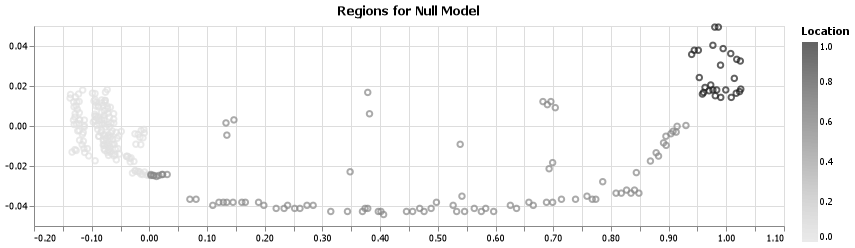

In [9]:
#make sure this generates the correct regions
newTopSim = zeros(279)

for i in 1:160
    newTopSim[i] = 0
end
for i in 1:92
    newTopSim[i+160] = 0.5
end
for i in 1:27
    newTopSim[i+252] = 1
end

df = DataFrame(xPosition=labelsTimesPositionsType[:,3], yPosition=labelsTimesPositionsType[:,4], Location = newTopSim)

df |> @vlplot(:point, title = "Regions for Null Model", x= {title = "", :xPosition}, y= { title = "", :yPosition},  color = { :Location , scale = {scheme = :greys } }, width = 750, legend = false)



In [10]:
#make sub-arrays for only the head, tail, and body dection
headLabelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),160,5)
bodyLabelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),92,5)
tailLabelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),27,5)

for i in 1:160
    headLabelsTimesPositionsType[i,:] = labelsTimesPositionsType[i,:]
end
for i in 1:92
    bodyLabelsTimesPositionsType[i,:] = labelsTimesPositionsType[i+160,:]
end
for i in 1:27
    tailLabelsTimesPositionsType[i,:] = labelsTimesPositionsType[i+160+92,:]
end

println("output: headLabelsTimesPositionsType and bodyLabelsTimesPositionsType and tailLabelsTimesPositionsType")

output: headLabelsTimesPositionsType and bodyLabelsTimesPositionsType and tailLabelsTimesPositionsType


In [11]:
#determine number of inter and intra connections
headHead = 0
headBody = 0
headTail = 0
bodyBody = 0
bodyTail = 0
tailTail = 0

for k in 1:2287
    initial = connectionList[k,1]
    terminal = connectionList[k,2]
    
    #find location of initial node
    for i in 1:160
        if headLabelsTimesPositionsType[i,1] == initial
            
            for i in 1:160
                if headLabelsTimesPositionsType[i,1] == terminal
                    headHead += 1
                end
            end
      
            for i in 1:92
                if bodyLabelsTimesPositionsType[i,1] == terminal
                    headBody += 1
                end
            end
      
        
            for i in 1:27
                if tailLabelsTimesPositionsType[i,1] == terminal
                    headTail += 1
                end
            end
            
        end
    end
      
    for i in 1:92
        if bodyLabelsTimesPositionsType[i,1] == initial
            
            for i in 1:160
                if headLabelsTimesPositionsType[i,1] == terminal
                    headBody += 1
                end
            end
      
            for i in 1:92
                if bodyLabelsTimesPositionsType[i,1] == terminal
                    bodyBody += 1
                end
            end
      
        
            for i in 1:27
                if tailLabelsTimesPositionsType[i,1] == terminal
                    bodyTail += 1
                end
            end
            
        end
    end
      
        
    for i in 1:27
        if tailLabelsTimesPositionsType[i,1] == initial
            for i in 1:160
                if headLabelsTimesPositionsType[i,1] == terminal
                    headTail += 1
                end
            end
      
            for i in 1:92
                if bodyLabelsTimesPositionsType[i,1] == terminal
                    bodyTail += 1
                end
            end
      
        
            for i in 1:27
                if tailLabelsTimesPositionsType[i,1] == terminal
                    tailTail += 1
                end
            end
        end
    end
end

println("output: headLabelsTimesPositionsType and bodyLabelsTimesPositionsType and tailLabelsTimesPositionsType")

output: headLabelsTimesPositionsType and bodyLabelsTimesPositionsType and tailLabelsTimesPositionsType


In [12]:
#concludes with 1214 h-h, 413 h-b, 198 h-t, 264 b-b, 142 b-t, 56 t-t
#head is 1:160
#body is 161:252
#tail is 253:279


In [13]:
#store all the connections for each area pairing
headHeadConnections = zeros(1214,2)
headBodyConnections = zeros(413,2)
headTailConnections = zeros(198,2)
bodyBodyConnections = zeros(264,2)
bodyTailConnections = zeros(142,2)
tailTailConnections = zeros(56,2)
counter = 0

#store all h-h connections
for i in 2:160
    for j in 1:i-1
        
        if positionSortedAdjacencyMatrix[i,j] == 1
            counter += 1
            headHeadConnections[counter,1] = i
            headHeadConnections[counter,2] = j
        end
        
    end
end
counter = 0

#store all h-b connections
for i in 1:160
    for j in 161:252
        
        if positionSortedAdjacencyMatrix[i,j] == 1
            counter += 1
            headBodyConnections[counter,1] = i
            headBodyConnections[counter,2] = j
        end
        
    end
end
counter = 0

#store all h-t connections
for i in 1:160
    for j in 253:279
        
        if positionSortedAdjacencyMatrix[i,j] == 1
            counter += 1
            headTailConnections[counter,1] = i
            headTailConnections[counter,2] = j
        end
        
    end
end
counter = 0

#store all b-b connections
for i in 161:252
    for j in 161:252
        if i > j
        if positionSortedAdjacencyMatrix[i,j] == 1
            counter += 1
            bodyBodyConnections[counter,1] = i
            bodyBodyConnections[counter,2] = j
        end
        end
        
    end
end
counter = 0

#store all b-t connections
for i in 161:252
    for j in 253:279
        
        if positionSortedAdjacencyMatrix[i,j] == 1
            counter += 1
            bodyTailConnections[counter,1] = i
            bodyTailConnections[counter,2] = j
        end
        
    end
end
counter = 0

#store all t-t connections
for i in 253:279
    for j in 253:279
        if i > j
        if positionSortedAdjacencyMatrix[i,j] == 1
            counter += 1
            tailTailConnections[counter,1] = i
            tailTailConnections[counter,2] = j
        end
        end
    end
end

println("output: headHeadConnections and headBodyConnections and headTailConnections and bodyBodyConnections and bodyTailConnections and tailTailConnections")

output: headHeadConnections and headBodyConnections and headTailConnections and bodyBodyConnections and bodyTailConnections and tailTailConnections


In [14]:
#concludes with 1214 h-h, 413 h-b, 198 h-t, 264 b-b, 142 b-t, 56 t-t
#head is 1:160
#body is 161:252
#tail is 253:279


In [15]:
#make a null model replica where we preserve connections and degree distribution by doing a-b, c-d swaps within categories
ncopies = 1000

#make ncopies slots to place copies of adjacency matrix, and pre-load with 300s
nullModelDistanceDegree = zeros(279,279,ncopies)
for k in 1:ncopies
    for i in 1:279
        for j in 1:279
            nullModelDistanceDegree[i,j,k] = 300
        end
    end
end


for k in 1:ncopies
        
    #perform selections within regions and make a connection list
    #within each type, we perform nEdges*10 rewirings
    newConnections = zeros(2287,2)
    
    #1214 h-h connections
    for i in 1:12140
        first = rand(1:1214)
        second = rand(1:1214)
        while first == second
            second = rand(1:1214)
        end
        
        shadowCache = headHeadConnections[first,1]
        headHeadConnections[first,1] = headHeadConnections[second,1]
        headHeadConnections[second,1] = shadowCache
        
    end
    
    #413 h-b connections
    for i in 1:4130
        first = rand(1:413)
        second = rand(1:413)
        while first == second
            second = rand(1:413)
        end
        
        shadowCache = headBodyConnections[first,1]
        headBodyConnections[first,1] = headBodyConnections[second,1]
        headBodyConnections[second,1] = shadowCache
    end
    
     #198 h-t connections
    for i in 1:1980
        first = rand(1:198)
        second = rand(1:198)
        while first == second
            second = rand(1:198)
        end
        
        shadowCache = headTailConnections[first,1]
        headTailConnections[first,1] = headTailConnections[second,1]
        headTailConnections[second,1] = shadowCache
    end
    
     #264 b-b connections
    for i in 1:2640
        first = rand(1:264)
        second = rand(1:264)
        while first == second
            second = rand(1:264)
        end
        
        shadowCache = bodyBodyConnections[first,1]
        bodyBodyConnections[first,1] = bodyBodyConnections[second,1]
        bodyBodyConnections[second,1] = shadowCache
    end
    
    #142 b-t connections
    for i in 1:1420
        first = rand(1:142)
        second = rand(1:142)
        while first == second
            second = rand(1:142)
        end
        
        shadowCache = bodyTailConnections[first,1]
        bodyTailConnections[first,1] = bodyTailConnections[second,1]
        bodyTailConnections[second,1] = shadowCache
    end
    
     #56 b-b connections
    for i in 1:560
        first = rand(1:56)
        second = rand(1:56)
        while first == second
            second = rand(1:56)
        end
        
        shadowCache = tailTailConnections[first,1]
        tailTailConnections[first,1] = tailTailConnections[second,1]
        tailTailConnections[second,1] = shadowCache
    end
   
    #to make things easier, just load all this into a large connection list
 
    newConnections = zeros(2287,2)
    for i in 1:1214
        newConnections[i,1] = headHeadConnections[i,1]
        newConnections[i,2] = headHeadConnections[i,2]
    end
    for i in 1:413
        newConnections[i+1214,1] = headBodyConnections[i,1]
        newConnections[i+1214,2] = headBodyConnections[i,2]
    end
    for i in 1:198
        newConnections[i+1627,1] = headHeadConnections[i,1]
        newConnections[i+1627,2] = headHeadConnections[i,2]
    end
    for i in 1:264
        newConnections[i+1825,1] = headHeadConnections[i,1]
        newConnections[i+1825,2] = headHeadConnections[i,2]
    end
    for i in 1:142
        newConnections[i+2089,1] = headHeadConnections[i,1]
        newConnections[i+2089,2] = headHeadConnections[i,2]
    end
    for i in 1:56
        newConnections[i+2231,1] = headHeadConnections[i,1]
        newConnections[i+2231,2] = headHeadConnections[i,2]
    end
    
   
    #now using the connections list, load an adjacency matrix
    for i in 1:2287
        initial = trunc(Int, newConnections[i,1])
        terminal = trunc(Int, newConnections[i,2])
        nullModelDistanceDegree[initial, terminal,k] = maximum([initial, terminal])
        nullModelDistanceDegree[terminal, initial,k] = maximum([initial, terminal])
    end
    
    #now sort this null model by birth time (pretend like nodes are x-coor sorted)
    
    sortThis = labelsTimesPositionsType[:,:]
    
    for p in 1:279
        movement = 0
    
        while p - movement > 1 && sortThis[p - movement, 2] < sortThis[p-movement - 1, 2]
            shadowCache = sortThis[p - movement, :]
            sortThis[p - movement, :] = sortThis[p - movement - 1, :]
            sortThis[p - movement - 1, :] = shadowCache
            
            shadowCache = nullModelDistanceDegree[p - movement, :,k]
            nullModelDistanceDegree[p - movement, :,k] = nullModelDistanceDegree[p - movement - 1, :,k]
            nullModelDistanceDegree[p - movement - 1, :,k] = shadowCache 
            
            shadowCache = nullModelDistanceDegree[:,p - movement,k]
            nullModelDistanceDegree[:,p - movement, k] = nullModelDistanceDegree[:,p - movement - 1, k]
            nullModelDistanceDegree[:,p - movement - 1, k] = shadowCache   
        
            movement += 1
        end
    end
end

println("output: nullModelDistanceDegree")

output: nullModelDistanceDegree


In [24]:
BettiCurves = zeros(279,3,ncopies)

for k in 1:ncopies
    
    println(k)

#computes the betti curves in 0-2 dimensions

eireneMatrix = eirene(nullModelDistanceDegree[:,:,k], model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)

#make stuff to store betti curves

barcodes = barcode(eireneMatrix, dim=0)
bigness = size(barcodes,1)
bettiNumber = 0
    
    

#calculate and store dimension 0 betti values

betti = betticurve(eireneMatrix, dim = 0)

for i in 1:279
    #find the betti number for this time
    
    counter = 0
    found = false
    while !found
        counter += 1
        if betti[counter,1] == i
            found = true
        end
    end
    BettiCurves[i,1,k] = betti[counter,2]
end


#calculate and store dimension 1 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=1)
bigness = size(barcodes,1)
bettiNumber = 0

for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,2,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,2,k] = bettiNumber
end

#calculate and store dimension 2 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=2)
bigness = size(barcodes,1)
bettiNumber = 0

for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,3,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,3,k] = bettiNumber
end
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [25]:
#computes average and standard deviation of 1000 copies
bettiMeans = zeros(279,3)
bettiStd = zeros(279,3)

for i in 1:279
    bettiMeans[i,1] = mean(BettiCurves[i,1,:])
    bettiMeans[i,2] = mean(BettiCurves[i,2,:])
    bettiMeans[i,3] = mean(BettiCurves[i,3,:])
    
    bettiStd[i,1] = std(BettiCurves[i,1,:])
    bettiStd[i,2] = std(BettiCurves[i,2,:])
    bettiStd[i,3] = std(BettiCurves[i,3,:])
end

In [26]:
BirthTimes = zeros(279)
for i in 1:279
    BirthTimes[i] = (birthTimes[1])[i]
end
sort!(BirthTimes)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[26]:3
└ @ Core .\In[26]:3


279-element Array{Float64,1}:
  253.08
  278.01
  291.01
  293.47
  293.47
  293.65
  294.34
  294.34
  295.0 
  295.41
  295.6 
  296.25
  296.3 
    ⋮   
 1752.4 
 1752.4 
 1866.7 
 1892.1 
 2005.3 
 2005.3 
 2100.4 
 2100.4 
 2100.4 
 2100.4 
 2324.7 
 2324.7 

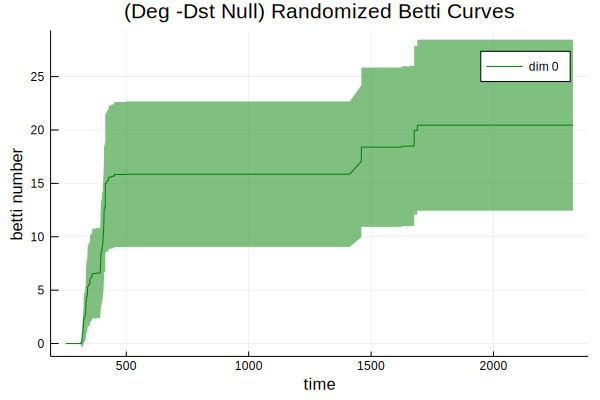

In [29]:
plot(BirthTimes[:], bettiMeans[:,3], ribbon = bettiStd[:,3], color = [:green], label = ["dim 0"], title = "(Deg -Dst Null) Randomized Betti Curves", xlabel = "time", ylabel = "betti number")

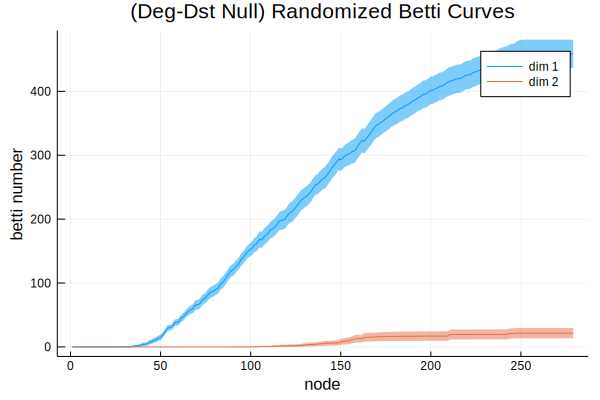

In [23]:
plot(1:279, bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], label = ["dim 1", "dim 2"], title = "(Deg-Dst Null) Randomized Betti Curves", xlabel = "node", ylabel = "betti number")

In [23]:
#load neccesary data files
positions = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279positions.csv", copycols = true, header = false)
positionsLabels = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279positionsLabels.csv", copycols = true, header = false)
birthTimes = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279birthTimes.csv", copycols = true, header = false)
birthTimesLabels = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279birthTimesLabels.csv", copycols = true, header = false)
connectionList = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//NeuronConnect_corrected.csv", copycols = true, header = false)
labeledTypeList = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279labeledTypes.csv", copycols = true, header = false)
oneDimTopSim = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//mostCurrentOneDimensionalSimilarity.csv", copycols = true, header = false)
twoDimTopSim = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//mostCurrentTwoDimensionalSimilarity.csv", copycols = true, header = false)


#done
println("done")

done


In [24]:
#process all the data into a single array sorted by birth time

#creates an array for positions with their labels
positionsMatrix = Array{Any, 2}(UndefInitializer(),279,3)

for i in 1:279
    positionsMatrix[i,1] = positionsLabels[1][i]
    positionsMatrix[i,2] = positions[i,1]
    positionsMatrix[i,3] = positions[i,2]
end

#creates an array for positions with their labels
birthTimesMatrix = Array{Any, 2}(UndefInitializer(),279,2)

for i in 1:279
    birthTimesMatrix[i,1] = birthTimesLabels[1][i]
    birthTimesMatrix[i,2] = birthTimes[1][i]
end

#creates an array for types with their labels
typeMatrix = Array{Any, 2}(UndefInitializer(), 279,2)

for i in 1:279
    typeMatrix[i,1] = labeledTypeList[1][i]
    typeMatrix[i,2] = labeledTypeList[2][i]
end



#sorts all the above matricies by neuron label to make them compatible
for i in 1:279
    movement = 0
    
    while i - movement > 1 && positionsMatrix[i - movement, 1] < positionsMatrix[i-movement - 1, 1]
        shadowCache = positionsMatrix[i - movement, :]
        positionsMatrix[i - movement, :] = positionsMatrix[i - movement - 1, :]
        positionsMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    movement = 0
    
    while i - movement > 1 && birthTimesMatrix[i - movement, 1] < birthTimesMatrix[i-movement - 1, 1]
        shadowCache = birthTimesMatrix[i - movement, :]
        birthTimesMatrix[i - movement, :] = birthTimesMatrix[i - movement - 1, :]
        birthTimesMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    movement = 0
    
    while i - movement > 1 && typeMatrix[i - movement, 1] < typeMatrix[i-movement - 1, 1]
        shadowCache = typeMatrix[i - movement, :]
        typeMatrix[i - movement, :] = typeMatrix[i - movement - 1, :]
        typeMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#stores all these data points into a single concise matrix
labelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),279,5)

labelsTimesPositionsType[:,1:2] = birthTimesMatrix[:,:]
labelsTimesPositionsType[:,3:4] = positionsMatrix[:,2:3]
labelsTimesPositionsType[:,5] = typeMatrix[:,2]

#alter the positions isometrically to look nicer 
labelsTimesPositionsType[:,3] *= -1
labelsTimesPositionsType[:,4] *= -1


#sorts new matrix by birth time
for i in 1:279
    movement = 0
    
    while i - movement > 1 && labelsTimesPositionsType[i - movement, 2] < labelsTimesPositionsType[i-movement - 1, 2]
        shadowCache = labelsTimesPositionsType[i - movement, :]
        labelsTimesPositionsType[i - movement, :] = labelsTimesPositionsType[i - movement - 1, :]
        labelsTimesPositionsType[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#processes connection list and stores that in its own matrix

connectionBase = Array{Any, 2}(UndefInitializer(),6417,4)

for i in 1:6417
    for j in 1:4
        connectionBase[i,j] = connectionList[i,j]
    end
end


#create adjacency matrix sorted by birth time weighted for a node filtered persistent homology calculation
birthSortedAdjacencyMatrix = zeros(279,279)
       
for i in 1:279
    for j in 1:279
        birthSortedAdjacencyMatrix[i,j] = 300
    end
end

for k in 1:6417
    for i in 1:279
        for j in 1:279
            if connectionBase[k,1] == labelsTimesPositionsType[i,1] && connectionBase[k,2] == labelsTimesPositionsType[j,1]
                max = maximum([i,j])
                birthSortedAdjacencyMatrix[i,j] = max
            end
            if connectionBase[k,1] == labelsTimesPositionsType[j,1] && connectionBase[k,2] == labelsTimesPositionsType[i,1]
                max = maximum([i,j])
                birthSortedAdjacencyMatrix[i,j] = max
            end
        end
    end
end

#done
println("output: labelsTimesPositionsType and birthSortedAdjacencyMatrix")

output: labelsTimesPositionsType and birthSortedAdjacencyMatrix


In [25]:
#computes the betti curves in 0-2 dimensions
eireneMatrix = eirene(birthSortedAdjacencyMatrix, model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)

#make arrays to store betti curves
betticurves = zeros(279,3)
barcodes = barcode(eireneMatrix, dim=0)
amount = size(barcodes,1)
bettiNumber = 0

#calculate and store dimension 0 betti values
for i in 1:279
    for j in 1:amount
        if barcodes[j,1] == i
            bettiNumber += 1
        end
        if barcodes[j,2] == i
            bettiNumber -= 1
        end
    end
    betticurves[i,1] = bettiNumber
end


#calculate and store dimension 1 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=1)
amount = size(barcodes,1)
bettiNumber = 0

for i in 1:279
    for j in 1:amount
        if barcodes[j,1] == i
            bettiNumber += 1
        end
        if barcodes[j,2] == i
            bettiNumber -= 1
        end
    end
    betticurves[i,2] = bettiNumber
end

#calculate and store dimension 2 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=2)
amount = size(barcodes,1)
bettiNumber = 0

for i in 1:279
    for j in 1:amount
        if barcodes[j,1] == i
            bettiNumber += 1
        end
        if barcodes[j,2] == i
            bettiNumber -= 1
        end
    end
    betticurves[i,3] = bettiNumber
end

println("done")

done


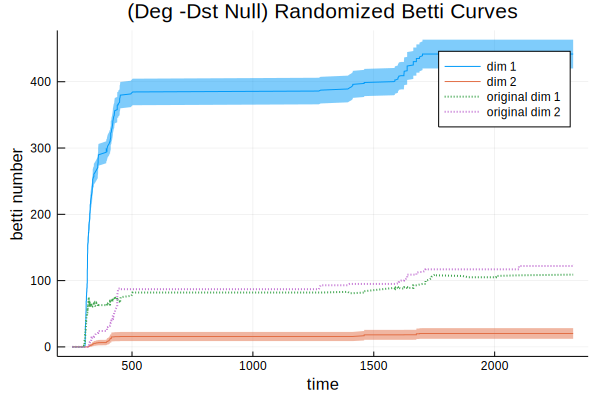

In [28]:
plot(BirthTimes[:], bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], label = ["dim 1", "dim 2"], title = "(Deg -Dst Null) Randomized Betti Curves", xlabel = "time", ylabel = "betti number")
plot!(labelsTimesPositionsType[:,2], betticurves[:,2:3], line=(:dot,2), label = [ "original dim 1" "original dim 2"])


In [24]:
#find the average birth/death rates of the null models



#construct rates matrix for each dimension using a +/- 5 window. column 1 is birth rate, column 2 is death rate
dimensionOneRates = zeros(279,2,ncopies)
dimensionTwoRates = zeros(279,2,ncopies)

for k in 1:ncopies
    println(k)

#find birth and death rate graphs of cavities in dimension 1 and 2 for the kth graph
eireneGraph = eirene(nullModelDistanceDegree[:,:,k], model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)
barcodesOne = barcode(eireneGraph, dim =1)
barcodesTwo = barcode(eireneGraph, dim = 2)


for i in 1:279
    #make and clear counters for new barcodes born and dying in each i+/-5 window
    newBirths1 = 0
    newDeaths1 = 0
    newBirths2 = 0
    newDeaths2 = 0
    
    #look through each barcode to see if one either is born or dies at time i+/1 5
    for j in i-5:i+1
        
        #handle case where j<1
        if j > 0
            newBirths1 += size(findall(x -> x == j, barcodesOne[:,1]))[1]
            newDeaths1 += size(findall(x -> x == j, barcodesOne[:,2]))[1]
        end
        
        if j > 0
            newBirths2 += size(findall(x -> x == j, barcodesTwo[:,1]))[1]
            newDeaths2 += size(findall(x -> x == j, barcodesTwo[:,2]))[1]
        end
    end
        
        
    #set rates at i to be the number of births/deaths in the window centered at i divided by the size of that window
        
    #handle case where i is too close to boundary and the width is not quite 11
    if i <= 5 
        minimum = 1
    end
    if i > 5
        minimum = i-5
    end
    
    if i <= 274 
        maximum = i+5
    end
    if i > 274
        maximum = 279
    end
    
    norm = maximum - minimum + 1
        
    dimensionOneRates[i,1,k] = newBirths1/norm
    dimensionOneRates[i,2,k] = newDeaths1/norm
    dimensionTwoRates[i,1,k] = newBirths2/norm
    dimensionTwoRates[i,2,k] = newDeaths2/norm
    
end
end
println("output: dimensionOneRates and dimensionTwoRates")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
output: dimensionOneRates and dimensionTwoRates


In [25]:
#computes average and standard deviation of birth/death rates
dimOneRateAve = zeros(279,2)
dimOneRateStd = zeros(279,2)
dimTwoRateAve = zeros(279,2)
dimTwoRateStd = zeros(279,2)

for i in 1:279
    dimOneRateAve[i,1] = mean(dimensionOneRates[i,1,:])
    dimOneRateAve[i,2] = mean(dimensionOneRates[i,2,:])
    dimTwoRateAve[i,1] = mean(dimensionTwoRates[i,1,:])
    dimTwoRateAve[i,2] = mean(dimensionTwoRates[i,2,:])
    
    
    dimOneRateStd[i,1] = std(dimensionOneRates[i,1,:])
    dimOneRateStd[i,2] = std(dimensionOneRates[i,2,:])
    dimTwoRateStd[i,1] = std(dimensionTwoRates[i,1,:])
    dimTwoRateStd[i,2] = std(dimensionTwoRates[i,2,:])
end

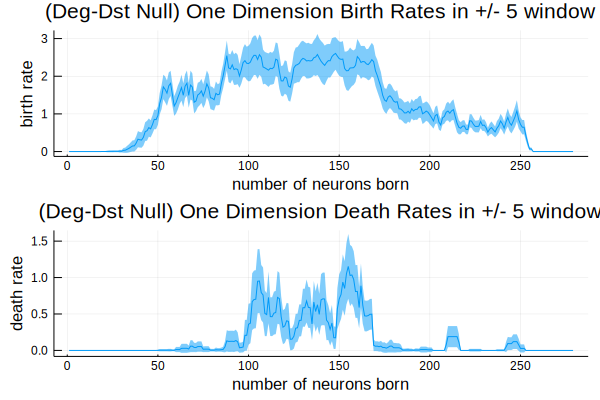

In [26]:
#plot the one dimension birth and death rates by number of neurons born
p1 = plot(1:279, dimOneRateAve[:,1], ribbon = dimOneRateStd[:,1], title = "(Deg-Dst Null) One Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "number of neurons born", ylabel = "birth rate")
p2 = plot(1:279, dimOneRateAve[:,2], ribbon = dimOneRateStd[:,2], title = "(Deg-Dst Null) One Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "number of neurons born", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

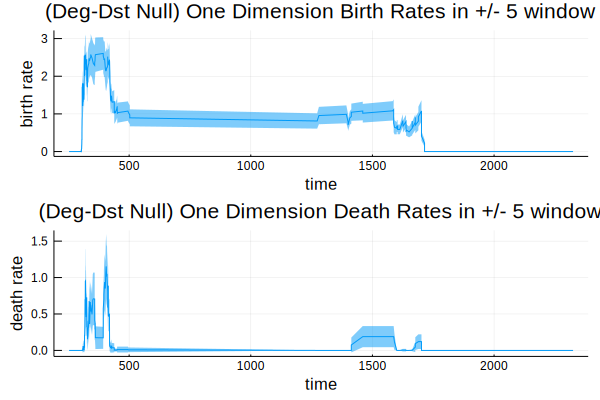

In [27]:
#plot the one dimension birth and death rates by time
p1 = plot(BirthTimes[:], dimOneRateAve[:,1], ribbon = dimOneRateStd[:,1], title = "(Deg-Dst Null) One Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "time", ylabel = "birth rate")
p2 = plot(BirthTimes[:], dimOneRateAve[:,2], ribbon = dimOneRateStd[:,2], title = "(Deg-Dst Null) One Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "time", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

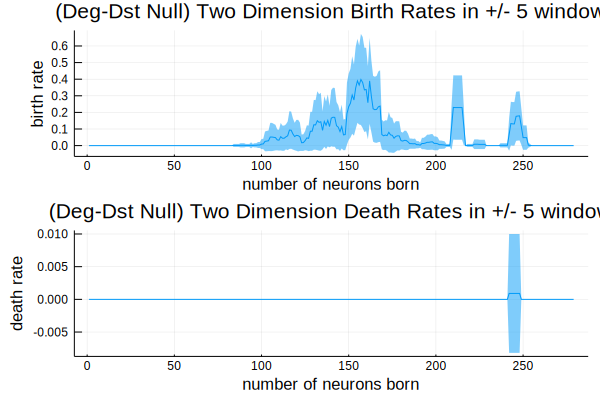

In [28]:
#plot the one dimension birth and death rates by number of neurons born
p1 = plot(1:279, dimTwoRateAve[:,1], ribbon = dimTwoRateStd[:,1], title = "(Deg-Dst Null) Two Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "number of neurons born", ylabel = "birth rate")
p2 = plot(1:279, dimTwoRateAve[:,2], ribbon = dimTwoRateStd[:,2], title = "(Deg-Dst Null) Two Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "number of neurons born", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

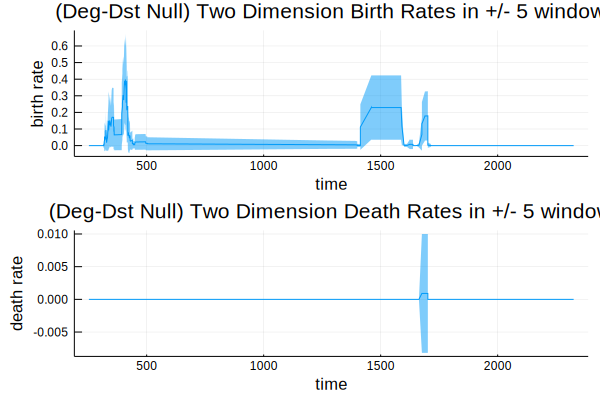

In [29]:
#plot the one dimension birth and death rates by time
p1 = plot(BirthTimes[:], dimTwoRateAve[:,1], ribbon = dimTwoRateStd[:,1], title = "(Deg-Dst Null) Two Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "time", ylabel = "birth rate")
p2 = plot(BirthTimes[:], dimTwoRateAve[:,2], ribbon = dimTwoRateStd[:,2], title = "(Deg-Dst Null) Two Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "time", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

In [31]:
topologicalSimilarityOne = zeros(279,279)

279×279 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [32]:
#computes topological similarity for first null model


    
#hold barcodes for topological similarity calculation
barcodes = Array{Any, 2}(UndefInitializer(), 279,279)

matrix = nullModelDistanceDegree[:,:,1]

eireneGraph = eirene(matrix[:,:], minrad = 0.5, maxrad = 301, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim =1)

originalBarcodes = zeros(size(oneDimBarcodes)[1],3)

if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end

barcodes[1,1] = originalBarcodes

for i in 2:279
    
    println(i)
    
    for j in 1: i-1
        
        newArray = matrix[:,:]
        
        for a in 1:279
            if newArray[i,a] < 300
                newArray[i,a] = maximum([j,a])
                newArray[a,i] = maximum([j,a])
            end
            
            if newArray[j,a] < 300
                newArray[j,a] = maximum([i,a])
                newArray[a,j] = maximum([i,a])
            end
        end
        
        eireneReordered = eirene(newArray, minrad = 0.5, maxrad = 300, maxdim =1)
        reorderedBarcodes = barcode(eireneReordered, dim =1)
            
        newBarcodes = zeros(size(reorderedBarcodes)[1],3)

        if size(reorderedBarcodes)[1] > 0
            for i in 1:size(reorderedBarcodes)[1]
                newBarcodes[i,1] = 1
                newBarcodes[i,2] = reorderedBarcodes[i,1]
                newBarcodes[i,3] = reorderedBarcodes[i,2]
            end
        end
        
        barcodes[i,j] = newBarcodes
    
    end
end
  

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [33]:
#compute topological similarity for this graph


first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j] = oneDimensionSimilarity
        
    end
end


println("output: topologicalSimilarityOne - trial 1")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

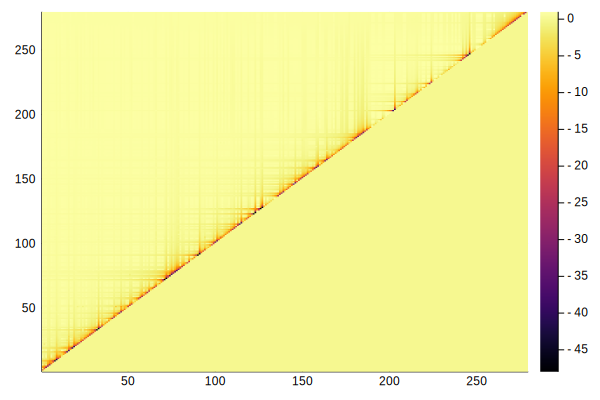

In [34]:
heatmap(topologicalSimilarityOne )

In [30]:
#compute topological similarity for this graph
k=2

first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j,k] = oneDimensionSimilarity
        
    end
end


println("output: topologicalSimilarityOne")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [31]:
CSV.write("trial two.csv", DataFrame(topologicalSimilarityOne[:,:,2]), writeheader = false)

"trial two.csv"

In [ ]:
#computes topological similarity for third  null model

k=3
    println("************************************")
#hold barcodes for topological similarity calculation
barcodes = Array{Any, 2}(UndefInitializer(), 279,279)

eireneGraph = eirene(nullModelDistanceDegree[:,:,k], minrad = 0.5, maxrad = 301, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim =1)

originalBarcodes = zeros(size(oneDimBarcodes)[1],3)

if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end

barcodes[1,1] = originalBarcodes

for i in 2:279
    
    println(i)
    
    for j in 1: i-1
        
        newArray = nullModelDistanceDegree[:,:,k]
        
        for a in 1:279
            if newArray[i,a] < 300
                newArray[i,a] = maximum([j,a])
                newArray[a,i] = maximum([j,a])
            end
            
            if newArray[j,a] < 300
                newArray[j,a] = maximum([i,a])
                newArray[a,j] = maximum([i,a])
            end
        end
        
        eireneReordered = eirene(newArray, minrad = 0.5, maxrad = 300, maxdim =1)
        reorderedBarcodes = barcode(eireneReordered, dim =1)
            
        newBarcodes = zeros(size(reorderedBarcodes)[1],3)

        if size(reorderedBarcodes)[1] > 0
            for i in 1:size(reorderedBarcodes)[1]
                newBarcodes[i,1] = 1
                newBarcodes[i,2] = reorderedBarcodes[i,1]
                newBarcodes[i,3] = reorderedBarcodes[i,2]
            end
        end
        
        barcodes[i,j] = newBarcodes
    
    end
end
        




In [ ]:
#compute topological similarity for this graph
k=3

first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j,k] = oneDimensionSimilarity
        
    end
end


println("output: topologicalSimilarityOne")

In [ ]:
#computes topological similarity for fourth  null model

k=4
    println("************************************")
#hold barcodes for topological similarity calculation
barcodes = Array{Any, 2}(UndefInitializer(), 279,279)

eireneGraph = eirene(nullModelDistanceDegree[:,:,k], minrad = 0.5, maxrad = 301, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim =1)

originalBarcodes = zeros(size(oneDimBarcodes)[1],3)

if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end

barcodes[1,1] = originalBarcodes

for i in 2:279
    
    println(i)
    
    for j in 1: i-1
        
        newArray = nullModelDistanceDegree[:,:,k]
        
        for a in 1:279
            if newArray[i,a] < 300
                newArray[i,a] = maximum([j,a])
                newArray[a,i] = maximum([j,a])
            end
            
            if newArray[j,a] < 300
                newArray[j,a] = maximum([i,a])
                newArray[a,j] = maximum([i,a])
            end
        end
        
        eireneReordered = eirene(newArray, minrad = 0.5, maxrad = 300, maxdim =1)
        reorderedBarcodes = barcode(eireneReordered, dim =1)
            
        newBarcodes = zeros(size(reorderedBarcodes)[1],3)

        if size(reorderedBarcodes)[1] > 0
            for i in 1:size(reorderedBarcodes)[1]
                newBarcodes[i,1] = 1
                newBarcodes[i,2] = reorderedBarcodes[i,1]
                newBarcodes[i,3] = reorderedBarcodes[i,2]
            end
        end
        
        barcodes[i,j] = newBarcodes
    
    end
end
        




In [ ]:
#compute topological similarity for this graph
k=4

first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j,k] = oneDimensionSimilarity
        
    end
end


println("output: topologicalSimilarityOne")

In [ ]:
#computes topological similarity for fifth  null model

k=5
    println("************************************")
#hold barcodes for topological similarity calculation
barcodes = Array{Any, 2}(UndefInitializer(), 279,279)

eireneGraph = eirene(nullModelDistanceDegree[:,:,k], minrad = 0.5, maxrad = 301, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim =1)

originalBarcodes = zeros(size(oneDimBarcodes)[1],3)

if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end

barcodes[1,1] = originalBarcodes

for i in 2:279
    
    println(i)
    
    for j in 1: i-1
        
        newArray = nullModelDistanceDegree[:,:,k]
        
        for a in 1:279
            if newArray[i,a] < 300
                newArray[i,a] = maximum([j,a])
                newArray[a,i] = maximum([j,a])
            end
            
            if newArray[j,a] < 300
                newArray[j,a] = maximum([i,a])
                newArray[a,j] = maximum([i,a])
            end
        end
        
        eireneReordered = eirene(newArray, minrad = 0.5, maxrad = 300, maxdim =1)
        reorderedBarcodes = barcode(eireneReordered, dim =1)
            
        newBarcodes = zeros(size(reorderedBarcodes)[1],3)

        if size(reorderedBarcodes)[1] > 0
            for i in 1:size(reorderedBarcodes)[1]
                newBarcodes[i,1] = 1
                newBarcodes[i,2] = reorderedBarcodes[i,1]
                newBarcodes[i,3] = reorderedBarcodes[i,2]
            end
        end
        
        barcodes[i,j] = newBarcodes
    
    end
end
        




In [ ]:
#compute topological similarity for this graph
k=5

first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j,k] = oneDimensionSimilarity
        
    end
end


println("output: topologicalSimilarityOne")